In [1]:
# https://chatgpt.com/c/6729efa8-ef3c-800c-a9c9-cc85e03dd3cb

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [4]:
# (Data Cleaning) This line uses the drop() method in Pandas to remove the columns 'Unnamed: 0', 'key', and 'pickup_datetime' from the DataFrame df.
df = df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1)

In [5]:
# remove rows with missing values (NaN) from the DataFrame df.
df.dropna(inplace=True)

<Axes: ylabel='fare_amount'>

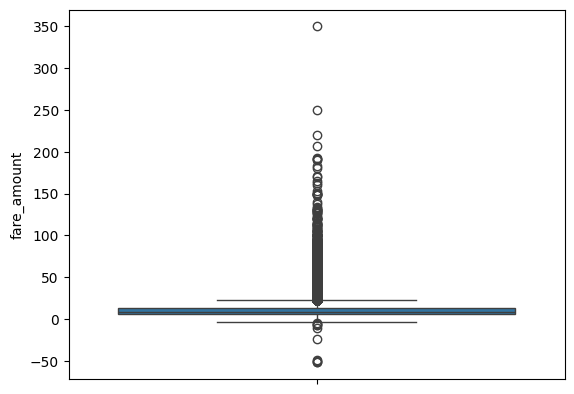

In [6]:
# What does a box plot shows? Median of data, Quartiles (lower, upper), whiskers, outliers
sns.boxplot(df['fare_amount'])

In [8]:
#  remove outliers from the 'fare_amount' column
low = df['fare_amount'].quantile(0.05) # This line calculates the 5th percentile (0.05 quantile) of the 'fare_amount' column and assigns it to the variable low. This essentially finds the value below which 5% of the data falls.
high = df['fare_amount'].quantile(0.95) # Similarly, this line calculates the 95th percentile (0.95 quantile) of the 'fare_amount' column and assigns it to the variable high. This finds the value above which 5% of the data falls.

df = df[(df['fare_amount'] > low) & (df['fare_amount'] < high)] # This is the core of the outlier removal process. It filters the DataFrame df to keep only the rows where the 'fare_amount' is greater than low and less than high. This effectively removes data points that fall outside the 5th and 95th percentiles, which are considered potential outliers.

<Axes: ylabel='fare_amount'>

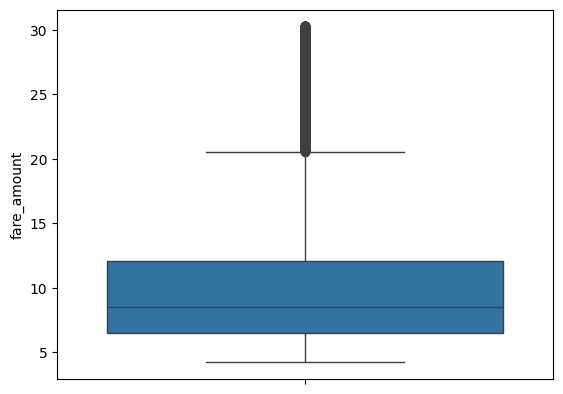

In [9]:
sns.boxplot(df['fare_amount'])

<Axes: >

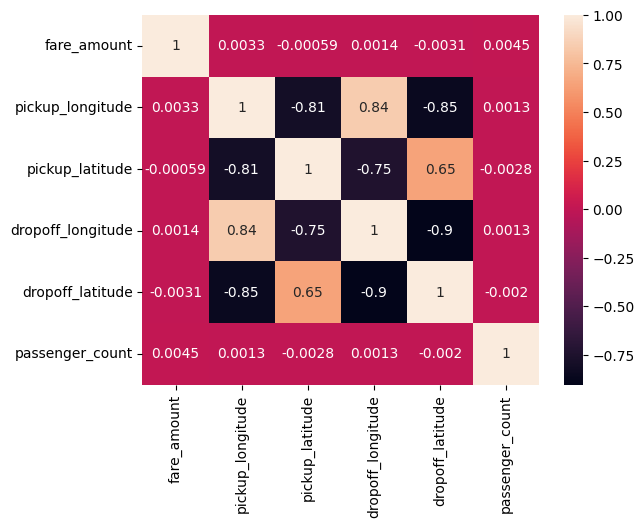

In [19]:
corr = df.corr() # correlation matrix
sns.heatmap(corr, annot=True) # This argument adds numerical annotations to the heatmap cells

# A correlation heatmap is a graphical representation of a correlation matrix. It uses color to represent the strength and direction of correlations between variables. Typically:

# Positive correlations are represented by warmer colors (e.g., red, orange).
# Negative correlations are represented by cooler colors (e.g., blue, purple).
# The intensity of the color indicates the strength of the correlation, with darker colors representing stronger correlations.

In [13]:
# Train test split
from sklearn.model_selection import train_test_split
# input data
x = df.drop(['fare_amount'],axis=1)
# output data
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print(RMSE)
r2 = r2_score(y_test,y_pred)
print(r2)

5.120356961979824
1.361252657816614e-06


In [16]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)

RMSE ->  2.606498425319006
R2 ->  0.7408722849682883
